In [1]:
include("c:/Users/vikra/OneDrive/Desktop/project/src/QuantumDD/QuantumDD.jl")
cd("c:/Users/vikra/OneDrive/Desktop/project")
using Pkg
Pkg.activate(".")
using .QuantumDD, Plots, LsqFit, FFTW

  Activating project at `c:\Users\vikra\OneDrive\Desktop\project`


## Hahn Echo vs FID under different noise models with 0 DC

### White noise

Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 00s (ETA: 0h 00m 00s)
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 00s (ETA: 0h 00m 00s)
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 00s (ETA: 0h 00m 00s)
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 00s (ETA: 0h 00m 00s)
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 00s (ETA: 0h 00m 00s)
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 00s (ETA: 0h 00m 00s)
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 00s (ETA: 0h 00m 00s)
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 00s (ETA: 0h 00m 00s)
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 00s (ETA: 0h 00m 00s)
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 00s (ETA: 0h 00m 00s)
Progress: [===================

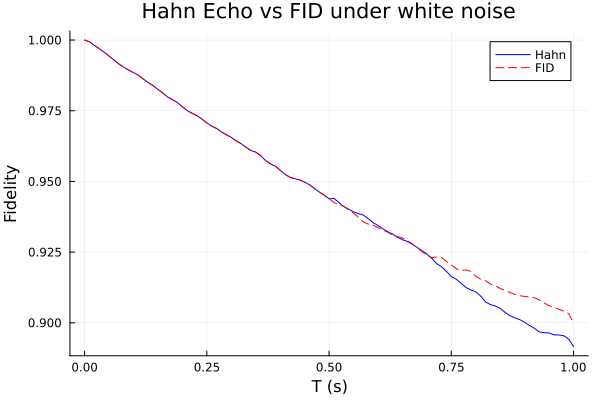

In [2]:
parameters = get_preset_params("white")
S_func = ω-> S(ω; parameters...)
# Run Hahn echo simulation
T_max = 1.0         # Total maximum evolution time
n_realizations = 1000 # Number of noise samples
σ = 0.1
dt = 1e-2             # Time step (resolution of T values)
T_vals_fid, avg_fid_fid = simulate_modulated_noise_fidelity(
    S_func = S_func,
    T_max = T_max,
    dt = dt,
    n_realizations = n_realizations,
    target_std = σ
)
#plot(T_vals_fid, avg_fid_fid, label="FID")
#pulses = get_shaped_pulses("HAHN", T_max, 1)
mod = get_modulation_function(get_pulse_times("HAHN", T_max, 1))

T_vals_hahn, avg_fid_hahn = simulate_modulated_noise_fidelity(
    S_func = S_func,
    mod_func = mod,
    T_max = T_max,
    dt = dt,
    n_realizations = n_realizations,
    target_std = σ
)
#plot(T_vals_hahn, avg_fid_hahn, label="Hahn under white noise")
plot(T_vals_hahn, avg_fid_hahn, label="Hahn", color = :blue)
plot!(T_vals_fid, avg_fid_fid, label="FID", color = :red, linestyle=:dash)
plot!(xlabel="T (s)", ylabel="Fidelity", title="Hahn Echo vs FID under white noise", legend=:topright, grid=true)

### OU Noise

Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 00s (ETA: 0h 00m 00s)
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 00s (ETA: 0h 00m 00s)
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 00s (ETA: 0h 00m 00s)
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 00s (ETA: 0h 00m 00s)
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 00s (ETA: 0h 00m 00s)
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 00s (ETA: 0h 00m 00s)
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 00s (ETA: 0h 00m 00s)
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 00s (ETA: 0h 00m 00s)
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 00s (ETA: 0h 00m 00s)
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 00s (ETA: 0h 00m 00s)
Progress: [===================

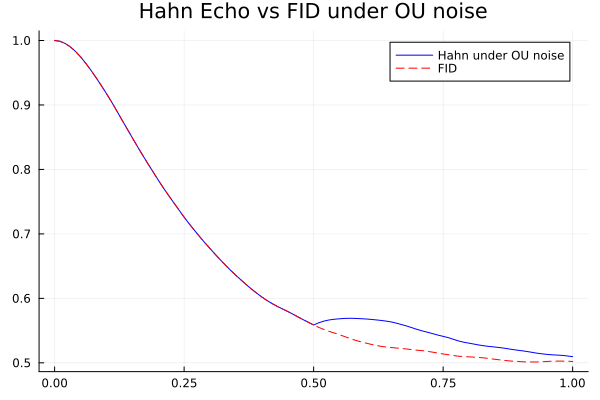

In [4]:
params = get_preset_params("ou")
S_func = ω -> S(ω; params...)
#pulses = get_shaped_pulses("HAHN", T_max, 1)
mod = get_modulation_function(get_pulse_times("HAHN", T_max, 1))

T_vals_hahn, avg_fid_hahn = simulate_modulated_noise_fidelity(
    S_func = S_func,
    mod_func = mod,
    T_max = T_max,
    dt = dt,
    n_realizations = n_realizations,
    target_std = σ
)
#plot(T_vals_hahn, avg_fid_hahn, label="Hahn under OU noise", color = :blue)
T_vals_fid, avg_fid_fid = simulate_modulated_noise_fidelity(
    S_func = S_func,
    T_max = T_max,
    dt = dt,
    n_realizations = n_realizations,
    target_std = σ
)
plot(T_vals_hahn, avg_fid_hahn, label="Hahn under OU noise", color = :blue)
plot!(T_vals_fid, avg_fid_fid, label="FID", color = :red, linestyle=:dash)
title!("Hahn Echo vs FID under OU noise")

### 1/f noise

Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 00s (ETA: 0h 00m 00s)
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 00s (ETA: 0h 00m 00s)
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 00s (ETA: 0h 00m 00s)
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 00s (ETA: 0h 00m 00s)
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 00s (ETA: 0h 00m 00s)
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 00s (ETA: 0h 00m 00s)
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 00s (ETA: 0h 00m 00s)
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 00s (ETA: 0h 00m 00s)
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 00s (ETA: 0h 00m 00s)
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 00s (ETA: 0h 00m 00s)
Progress: [===================

Excessive output truncated after 524385 bytes.

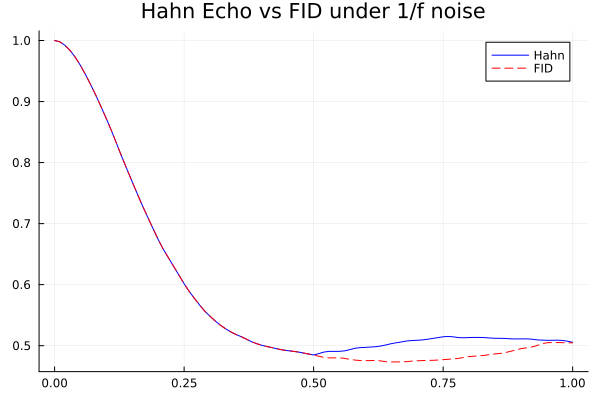

In [5]:
params = get_preset_params("1/f")
S_func = ω -> S(ω; params...)
#pulses = get_shaped_pulses("HAHN", T_max, 1)
mod = get_modulation_function(get_pulse_times("HAHN", T_max, 1))

T_vals_hahn, avg_fid_hahn = simulate_modulated_noise_fidelity(
    S_func = S_func,
    mod_func = mod,
    T_max = T_max,
    dt = dt,
    n_realizations = n_realizations,
    target_std = σ
)
#plot(T_vals_hahn, avg_fid_hahn, label="Hahn under 1/f noise", color = :blue)
T_vals_fid, avg_fid_fid = simulate_modulated_noise_fidelity(
    S_func = S_func,
    T_max = T_max,
    dt = dt,
    n_realizations = n_realizations,
    target_std = σ
)
plot(T_vals_hahn, avg_fid_hahn, label="Hahn", color = :blue)
plot!(T_vals_fid, avg_fid_fid, label="FID", color = :red, linestyle=:dash)
title!("Hahn Echo vs FID under 1/f noise", legend=:topright, grid=true)

## Hahn echo vs FID under different noise models with +ve DC

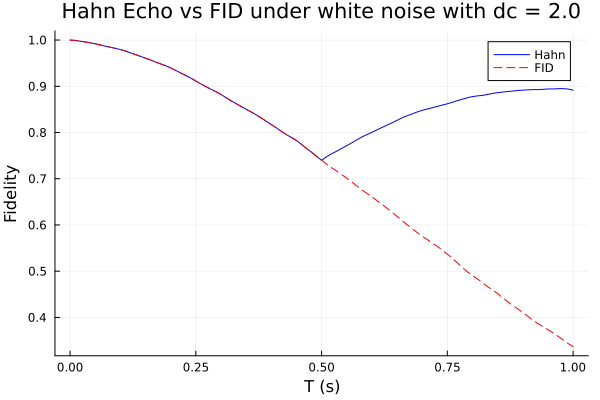

In [6]:
dc = 2.0
parameters = get_preset_params("white")
S_func = ω-> S(ω; parameters...)
# Run Hahn echo simulation
T_max = 1.0         # Total maximum evolution time
n_realizations = 1000 # Number of noise samples
σ = 0.1
dt = 1e-2             # Time step (resolution of T values)
T_vals_fid, avg_fid_fid = simulate_modulated_noise_fidelity(
    S_func = S_func,
    T_max = T_max,
    dt = dt,dc = dc,
    n_realizations = n_realizations,
    target_std = σ
)
#plot(T_vals_fid, avg_fid_fid, label="FID")
#pulses = get_shaped_pulses("HAHN", T_max, 1)
mod = get_modulation_function(get_pulse_times("HAHN", T_max, 1))

T_vals_hahn, avg_fid_hahn = simulate_modulated_noise_fidelity(
    S_func = S_func,
    mod_func = mod,
    #pulses = pulses,
    T_max = T_max,
    dt = dt,dc = dc,
    n_realizations = n_realizations,
    target_std = σ
)
#plot(T_vals_hahn, avg_fid_hahn, label="Hahn under white noise")
plot(T_vals_hahn, avg_fid_hahn, label="Hahn", color = :blue)
plot!(T_vals_fid, avg_fid_fid, label="FID", color = :red, linestyle=:dash)
plot!(xlabel="T (s)", ylabel="Fidelity", title="Hahn Echo vs FID under white noise with dc = $dc", legend=:topright, grid=true)

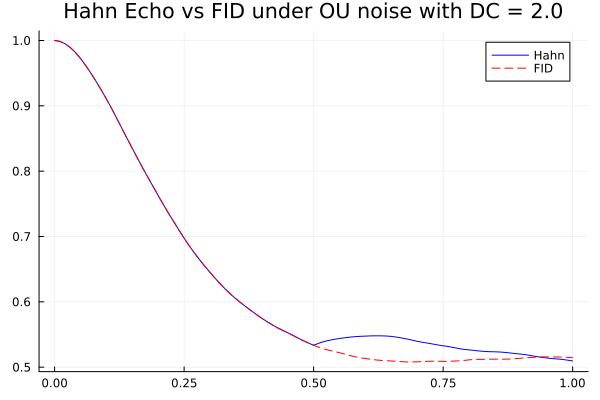

In [7]:
params = get_preset_params("ou")
S_func = ω -> S(ω; params...)
#pulses = get_shaped_pulses("HAHN", T_max, 1)
mod = get_modulation_function(get_pulse_times("HAHN", T_max, 1))

T_vals_hahn, avg_fid_hahn = simulate_modulated_noise_fidelity(
    S_func = S_func,
    mod_func = mod,
    #pulses = pulses,
    T_max = T_max,
    dt = dt, dc = dc,
    n_realizations = n_realizations,
    target_std = σ
)
#plot(T_vals_hahn, avg_fid_hahn, label="Hahn under OU noise", color = :blue)
T_vals_fid, avg_fid_fid = simulate_modulated_noise_fidelity(
    S_func = S_func,
    T_max = T_max,
    dt = dt,
    dc = dc,
    n_realizations = n_realizations,
    target_std = σ
)
plot(T_vals_hahn, avg_fid_hahn, label="Hahn", color = :blue)
plot!(T_vals_fid, avg_fid_fid, label="FID", color = :red, linestyle=:dash)
title!("Hahn Echo vs FID under OU noise with DC = $dc")

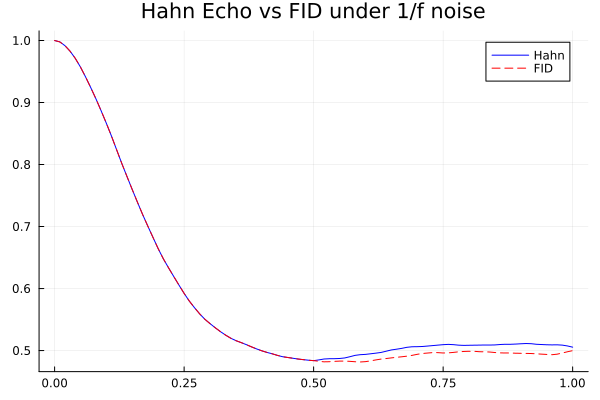

In [8]:
params = get_preset_params("1/f")
S_func = ω -> S(ω; params...)
#pulses = get_shaped_pulses("HAHN", T_max, 1)
mod = get_modulation_function(get_pulse_times("HAHN", T_max, 1))

T_vals_hahn, avg_fid_hahn = simulate_modulated_noise_fidelity(
    S_func = S_func,
    mod_func = mod,
    #pulses = pulses,
    T_max = T_max,
    dt = dt, dc = dc,
    n_realizations = n_realizations,
    target_std = σ
)
#plot(T_vals_hahn, avg_fid_hahn, label="Hahn under 1/f noise", color = :blue)
T_vals_fid, avg_fid_fid = simulate_modulated_noise_fidelity(
    S_func = S_func,
    T_max = T_max,
    dt = dt,
    dc = dc,
    n_realizations = n_realizations,
    target_std = σ
)
plot(T_vals_hahn, avg_fid_hahn, label="Hahn", color = :blue)
plot!(T_vals_fid, avg_fid_fid, label="FID", color = :red, linestyle=:dash)
title!("Hahn Echo vs FID under 1/f noise", legend=:topright, grid=true)